# Referencias

1. [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [Introducción a la Probabilidad, Bertsekas](https://vfu.bg/en/e-Learning/Math--Bertsekas_Tsitsiklis_Introduction_to_probability.pdf)
- [Introducción a la Machine Learning, Alpaidin](https://kkpatel7.files.wordpress.com/2015/04/alppaydin_machinelearning_2010.pdf)
- Apuntes de Grymberg de Proba 
- Apuntes del MIT

In [151]:
# Importar las librerías relevantes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib_venn import venn2
import math
import numpy.random as random
random.seed(42)

%matplotlib inline

# Probabilidad y Estadísticas para Inteligencia Artificial

**Profesor:** Dr. Ing. Pablo Briff

**Mail:** pbriff@fi.uba.ar

**Objetivo:** Hacer un repaso de proba y estadistica para solidificar las bases.

**Libros:** 
- Introducción a la Probabilidad, Versecas
- Introducción a la Machine Learning, Iapaidin
- Apuntes de Grymberg de Proba 
- Apuntes del MIT

**Metodología de evaluación:** Examen en la clase 4 de proba y la clase 8 de estadistica

# Axiomas de Probabilidad

- Experimiento aleatorio: son todos procesos cuya Salida(outcome) es desconocida
- Ley de demorgan: 
- Teoría de conjuntos: $ P(A \bigcap B) = P(A) + P(B) - P(A \bigcup B) $


# Probabilidad condicional:

Representa la probabilidad de un evento sujeto a la ocurrencia de otro. 

La manera matemática de representarlo, es:

$ P(A|B) = \frac{P(A \bigcap B)}{P(B)} $ 

Es relevante mencionar que si B y A son independientes, entonces:

$ P(A|B) = \frac{P(A) *P(B)}{P(B)} = P(A) $

$ P(B|A) = \frac{P(A) *P(B)}{P(A)} = P(B) $

# Probabilidad de Bayes

$ P(A|B) = \frac{P(B|A).P(A)}{P(B)} $ 

donde 
$ P(B|A)$ Se denomina la verosumilitud


$P(A) $ se denomina la probabilidad a priori

$ P(B) $ se denomina la probabilidad total  





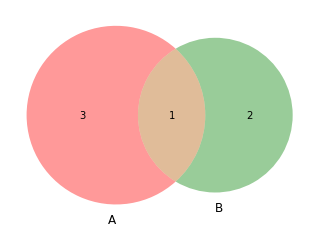

In [10]:
venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])
plt.show()


P(amarillo) = P(amarillo|rojo)*P(Rojo) + P(Amarillo| verde) * P(Verde)

# Función de distribución de probabilidad

Son las funciones que acumulan la probabilidad de una VA a lo largo de todo su subespacio. 

$ F(X \geq x) = \left\{ 
\begin{array}{rcl}
F(X) \geq 0 & \\ 
    \mbox{monotona creciente de a saltos} \\ 
    F(A \leq X \leq B) = F(B) -F(A) \\ 
    \mbox{Para variables continuas se} \\ 
    \mbox{ integra la Función de densidad, si es discreta} \\ 
    \mbox{se utiliza la sumatoria de la función de masa} 
\end{array}\right. $

$F(\overline{x}) = \int_{-\infty}^{+\infty}f_\overline{x}(x)dx = 1$

# Función de probabilidad combinada y marginal

la probabilidad marginal es la probabilidad de que X sea un a variable x y que la función de probabilidad de Y sea menor a infinito. Es decir, en una función de densidad conjunta, se integra en todo el espacio de una de las dos variables para obtener la funcion de distribución de la contraria.

en continuas:
$F(\overline{x,y}) = \int_{-\infty}^{y}\int_{-\infty}^{x}f_\overline{x,y}(x,y)dx dy$

en discretas: 
mismo pero con sumatorias

# Bayes en probabilidad combinada

$ f(x|y)_{\overline{X|Y}} = 
\frac{f_\overline{X|Y}(X,Y)}
{f_\overline{y}(y)} $

# Esperanza y opeaciones

En discretas
$ E(\overline{X}) = \sum P(X) . X $

En continuas 
$ E(f_{\overline{x}}(X)) = \int_{-\infty}^{+\infty} x . f_{\overline{x}}(x) dx$

Mide el centro de masa. 

Las operaciones de la esperanza son lineales.. Suma OK, multiplicación por escalar OK.. No tricky shit

# Varianza y operaciones

$var[\overline{X} = \sigma_{\overline x}^2 = E[(x-\mu)^2] = E[x^2] - (E[\overline{X}])^2 $
 
 $ E[x^2] = \int_{-\infty}^{\infty} x^2 f(x) dx$
 
 ### Operadores
 
- $ var[aX+b] = a^2 var[X] + var[b] = a^2 var[X] $
- 

# TCL

La sumatoria de n variables aleatorias i.i.d (independientes e identicamente distribuidas)

## Tarea - Clase 1
### Ejercicio 1

In [115]:
# Tarea

#Ejercicio 1

def combinator(n1, m):
    c = math.factorial(n1)/ (math.factorial(m)*math.factorial(n1-m))
    return c

class binomial():
        def __init__(self, n, p):
            self.n = n
            self.p = p
        
        def prob_exact(self, k):
            P_k = combinator(self.n, k) * self.p**k * (1 - self.p)**(self.n-k)
            return P_k
        
        def prob_less_eq(self, k):
            P_k = 0
            P_leq_K = 0
            for i in range(1, k):
                P_k = combinator(self.n, i) * self.p**i * (1 - self.p)**(self.n-i)
                P_leq_K += P_k
            return P_leq_K
        
    
# Ej 1.a
ej_1 = binomial(10, 0.4)
resp_ej_1 = ej_1.prob_exact(3)
print('La probabilidad teorica de obtener exactamente 3 cecas en 10 tiradas es: {:.2%}'.format(resp_ej_1))

# Ej 1.b
ej_1_b = binomial(10, 0.4)
lesseq_than_2 = ej_1_b.prob_less_eq(3)
biggerq_3 = 1 - lesseq_than_2
print('La probabilidad teorica de obtener 3 cecas o más en 10 tiradas es: {:.2%}'.format(biggerq_3))

# Ej 1.c

""" 
moneda con p=0.4
11 tiradas
B = Primera tirada es ceca = P(primera tirada ceca) = 0.4
A = probabilidad de =>3 cecas las próximas 10 tiradas = probabilidad que k => 3 cecas en 10 tiradas


P(A|B) = P(A) inter P(B) / P(B)

P(A) inter P(B) = las próximas tiradas son independientes de las pasadas. El proceso "No tiene memoria"

P(A|B) = P(A)P(B) / P(B)

P(A|B) = P(A)

"""

def generate_coin_toss(n, prob_tails):
    Coin_toss = random.uniform(0,1, size=n) < prob_tails
    return Coin_toss
def generate_k_samples_n_coin_toss(k, n, prob_tails):
    experiment_samples = np.zeros([k])

    for i in range(0,k):
        experiment_samples[i] = np.sum(generate_coin_toss(n, prob_tails))
        
    return experiment_samples

Samples_vector = generate_k_samples_n_coin_toss(100000, 10, 0.4)

P_simulated_equal_3 = sum(Samples_vector == 3)/len(Samples_vector) 
P_simulated_greq_3 = sum(Samples_vector >= 3)/len(Samples_vector) 

print('La probabilidad simulada de obtener exactamente 3 cecas en 10 tiradas es: {:.2%}'.format(P_simulated_equal_3))
print('La probabilidad simulada de obtener 3 cecas o más en 10 tiradas es: {:.2%}'.format(P_simulated_greq_3))

La probabilidad teorica de obtener exactamente 3 cecas en 10 tiradas es: 21.50%
La probabilidad teorica de obtener 3 cecas o más en 10 tiradas es: 83.88%
La probabilidad simulada de obtener exactamente 3 cecas en 10 tiradas es: 21.53%
La probabilidad simulada de obtener 3 cecas o más en 10 tiradas es: 83.24%


### Ejercicio 2
En una competencia se tienen 3 puertas de las cuales se debe elegir
una. Dos puertas tienen la foto de un chancho y la tercera tiene la
foto de un autom ́ovil. Si el participante acierta la puerta del
autom ́ovil, lo gana. En caso contrario, no gana nada. Una vez que el
participante elige una puerta, a ́un con todas las puerta cerradas, el
organizador de la competencia - que sabe en qu ́e puerta se encuentra
la foto del autom ́ovil - abre una de las tres puertas que tiene la foto
de un chancho. ¿Qu ́e le conviene hacer al participante, cambiar su
elecci ́on o no? Justificar usando probabilidad a priori y probabilidad
condicional.


B = Tomo el coche luego del cambio
A = Tomo el coche antes del cambio

  
Por teorema de la probabilidad total:
P(B) = P(B|A).P(A) + P(B|$\overline{A}$).P($\overline{A}$) =  P(B |$\overline{A}$)

- P(B|A) = 0, Son dos hechos contrapuestos, no pueden coexistir
- P($\overline{A}$) = 2/3, Es la probabilidad conjunta de que esté en la puerta 2 y 3.
- P(B|$\overline{A}$) = 1, Si no está en la primera puerta, tiene que estar en la otra

P(B) = 2/3

### Ejercicio 3


Sean X, Y dos v.a. i.i.d. U[0, 1]. Encontrar la expresi ́on de la funci ́on
de densidad de probabilidad conjunta.
(b) ¿Cu ́al es la probabilidad de que X > 0.7 y Y < 0.4 simult ́aneamente?
(c) ¿Cu ́al es el percentil 40 de X, i.e. x40 ?
(d) Simular en Octave escribiendo la pdf conjunta o usando funciones de
Octave rand,unifpdf,unifcdf
(e) Graficar la cdf en funci ́on de x, y

$f_x(x) = 1$

$f_y(y) = 1$

$f_{x,y}(x, y) = 1$

$P(x>0.7, y< 0.4) = \int_0^{0.4} \int_{0.7}^1 1 dx dy = \int_0^{0.4} ( 1 - 0.7) dy  
= (1-0.7)(0.4 - 0) = 0.12$

$F_{x,y}(x, y) = x.y$

Percentil 40 de X:

$F_{x}(x) = x = 0.4     -> el percentil 40 es 0.4$

$F_{x,y}(x, y) = 0.4y = 0.4y$




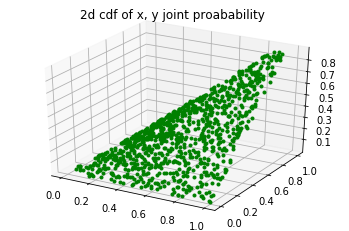

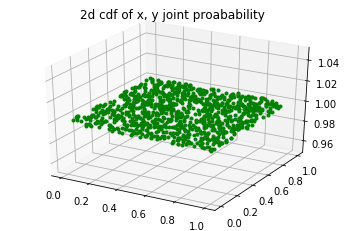

In [170]:
## function creation for simulation

def generate_uniform(n):
    uni_simulations = random.uniform(0,1, size=n)
    return uni_simulations
def generate_Rn_uniform(k, n):
    experiment_sampl = np.zeros([k, n])
    for i in range(0,k):
        experiment_sampl[i] = generate_uniform(n)
    return experiment_sampl

# Simulation
x, y = generate_Rn_uniform(1000, 2)[:,0],  generate_Rn_uniform(1000, 2)[:,1]


# Graphic
fig = plt.figure()
ax1 = plt.axes(projection = '3d')

_ = plt.title('2d cdf of x, y joint proabability ', c='black')
_ = plt.xticks(c='black')
_ = plt.yticks(c='black')

_ = ax1.plot3D(x, y, x*y, 'green', linestyle='none', marker='.')

plt.show()


fig = plt.figure()
ax2 = plt.axes(projection = '3d')

_ = plt.title('2d cdf of x, y joint proabability ', c='black')
_ = plt.xticks(c='black')
_ = plt.yticks(c='black')

_ = ax2.plot3D(x, y, 1, 'green', linestyle='none', marker='.')

plt.show()